In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

df = pd.read_csv('data\hilda_baci_data.csv')

In [3]:
df.head()

,ID,Date,Content,Username,Retweets,Likes,Replies,Quote Tweets,Hashtags
0,1659838953095135233,2023-05-20 08:30:19+00:00,I've been cooking for(four) days like hilda baci,Heezy_houdini,0,0,0,0,NaN
1,1659838521069252608,2023-05-20 08:28:36+00:00,@ernestadiq You're doing good... remain blessed,UfotGabriel,0,0,0,0,NaN
2,1659838840515747842,2023-05-20 08:29:52+00:00,"If Hilda Baci can do it, I can do it too🙏\nMak...",Aggy_Faya,0,0,0,0,NaN
3,1659838711364820992,2023-05-20 08:29:21+00:00,That idiot Pastor on the stage calling Hilda B...,ronaldnzimora,1,1,1,0,NaN
4,1659838844718424066,2023-05-20 08:29:53+00:00,@GWR How long to acknowledge Hilda Baci's reco...,PhPeakMilk,0,0,0,0,NaN


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,1.659605e+18,1.171008e+14,1.659401e+18,1.659505e+18,1.659590e+18,1.659684e+18,1.659839e+18
Retweets,1000.0,5.821000e+00,5.722992e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.262000e+03
Likes,1000.0,4.367100e+01,5.103101e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.061600e+04
Replies,1000.0,2.050000e+00,2.324749e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.770000e+02
Quote Tweets,1000.0,1.122000e+00,2.117781e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.180000e+02


In [5]:
df.isna().sum()

ID                0
Date              0
Content           0
Username          0
Retweets          0
Likes             0
Replies           0
Quote Tweets      0
Hashtags        892
dtype: int64

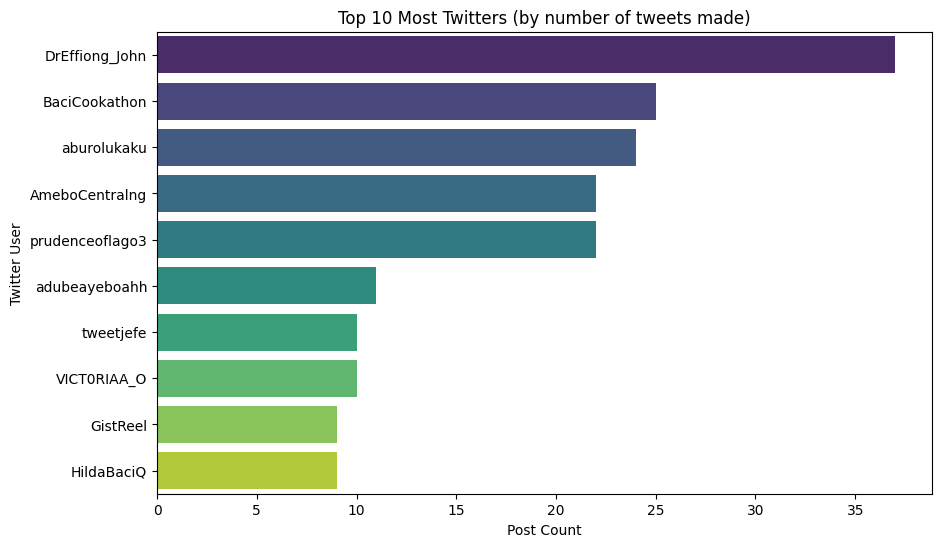

In [24]:
top_10_twitters = df['Username'].value_counts().head(10)

# Plot the top 10 most occurring values using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(y='Username', data=df, order=top_10_twitters.index, palette='viridis')
plt.xlabel('Post Count')
plt.ylabel('Twitter User')
plt.title('Top 10 Most Twitters (by number of tweets made)')
plt.show()

In [7]:
nltk.download('vader_lexicon')
# assigning sentiments of tweets using the vader lexicon

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each tweet in the 'Content' column
df['Sentiment'] = df['Content'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Print the DataFrame with the added 'Sentiment' column
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TOSHIBA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                    ID                       Date   
0  1659838953095135233  2023-05-20 08:30:19+00:00  \
1  1659838521069252608  2023-05-20 08:28:36+00:00   
2  1659838840515747842  2023-05-20 08:29:52+00:00   
3  1659838711364820992  2023-05-20 08:29:21+00:00   
4  1659838844718424066  2023-05-20 08:29:53+00:00   

                                             Content       Username  Retweets   
0  I've been cooking for(four) days  like hilda baci  Heezy_houdini         0  \
1    @ernestadiq You're doing good... remain blessed    UfotGabriel         0   
2  If Hilda Baci can do it, I can do it too🙏\nMak...      Aggy_Faya         0   
3  That idiot Pastor on the stage calling Hilda B...  ronaldnzimora         1   
4  @GWR How long to acknowledge Hilda Baci's reco...     PhPeakMilk         0   

   Likes  Replies  Quote Tweets Hashtags  Sentiment  
0      0        0             0      NaN     0.3612  
1      0        0             0      NaN     0.5994  
2      0        0             0 

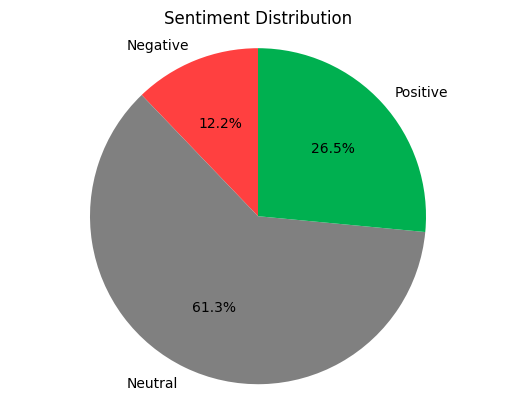

In [8]:
negative_sentiment = df[df['Sentiment'] < -0.5]
neutral_sentiment = df[df['Sentiment'] == 0]
positive_sentiment = df[df['Sentiment'] > 0.5]

# Calculate the counts for each category
negative_count = negative_sentiment.shape[0]
neutral_count = neutral_sentiment.shape[0]
positive_count = positive_sentiment.shape[0]

# Create a list of counts
sentiment_counts = [negative_count, neutral_count, positive_count]

# Define labels and colors
sentiment_labels = ['Negative', 'Neutral', 'Positive']
colors = ['#FF4040', '#808080', '#00B050']

# Create a pie chart using Seaborn and Matplotlib
plt.pie(sentiment_counts, labels=sentiment_labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Sentiment Distribution of Tweets')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()

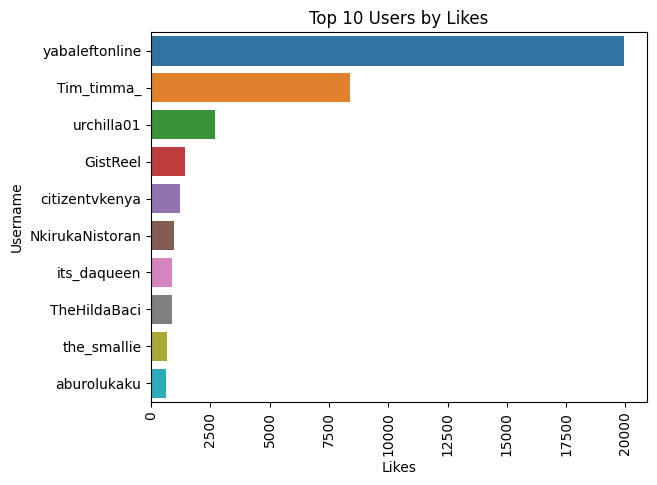

In [22]:


user_likes = df.groupby('Username')['Likes'].sum().reset_index()

top_10_users = user_likes.sort_values('Likes', ascending=False).head(10)

sns.barplot(y='Username', x='Likes', data=top_10_users)


plt.xticks(rotation=90)


plt.ylabel('Username')
plt.xlabel('Likes')
plt.title('Top 10 Users by Likes')


plt.show()


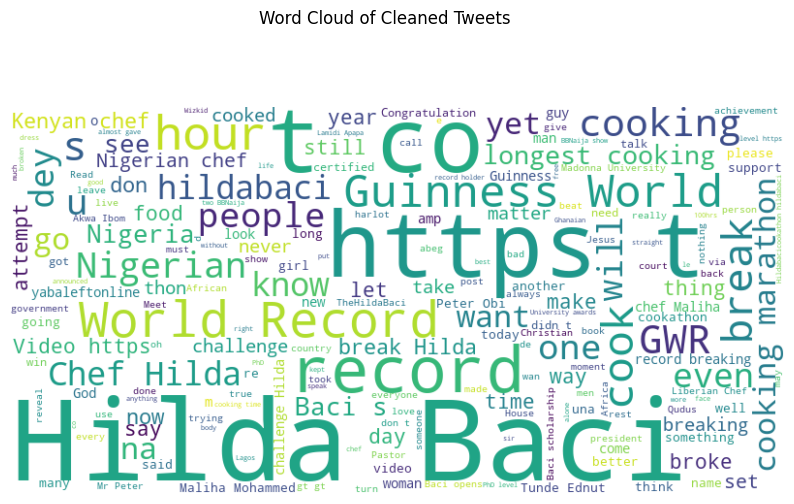

In [26]:
from wordcloud import WordCloud, STOPWORDS

df['clean_tweets'] = df['Content'].str.replace('[^a-zA-Z\s]', '')

# Join all cleaned tweets into a single string
all_tweets = ' '.join(df['clean_tweets'])

# Set the stopwords
stopwords = set(STOPWORDS)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(all_tweets)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.suptitle('Word Cloud of Cleaned Tweets')

# Display the WordCloud
plt.show()
